
# Trabalho Final de Álgebra Linear Algorítmica

##Alunos
Gabriela Vilar Carneiro - 123687898

João Victor Binda Magno - 123711443

## Descrição

Muitos investidores enfrentam o desafio de escolher ações na bolsa que sejam compatíveis com seu perfil de risco e objetivos financeiros. Como resultado, a insegurança é comum, especialmente entre iniciantes, que temem fazer escolhas equivocadas que possam resultar em perdas financeiras significativas. Essa situação ressalta a importância da educação financeira e do uso de ferramentas ou assessorias especializadas para alinhar investimentos ao perfil do investidor. Por isso, para o nosso trabalho escolhemos um programa de sugestão de ações com base em um perfil de investidor, o InvestHelper. Ele foi criado justamente para ajudar na compra de ações de acordo com o perfil de investimento dos usuários.

## Como o Programa Funciona

No nosso programa o usuário define seu perfil de usuário, que consiste em um vetor com coeficientes de risco, retorno e liquidez. Esses coeficientes são números que variam de 0 a 1, sendo 1 o maior, e todas as ações também são vetores que contém esses mesmos coeficientes. Após o usuário definir seu perfil de usuário, ele escolhe quais ações ele está interessado em comprar para nosso programa calcular a compatibilidade dessas ações com o perfil de investimento do usuário. A saída do programa é a lista de ações de interesse juntamente com sua compatibilidade com o perfil do usuário e um gráfico representando visualmente por meio de vetores as ações em comparação com o perfil de investimento do usuário.

## Relação com Álgebra Linear Algorítmica

O programa usa vetores, operações vetoriais, e a norma Euclidiana, que são conceitos centrais da álgebra linear. Ele também relaciona esses conceitos com aplicações computacionais e geométricas, oferecendo um exemplo prático de como a álgebra linear algorítmica é aplicada para resolver problemas no mundo real, como na análise de investimentos e recomendação de ações.

**Representação de vetores no espaço tridimensional:**

As ações e o perfil do usuário são representados por vetores tridimensionais $[x, y, z]$ em que cada dimensão é um atributo específico: risco, retorno, liquidez. Os vetores no espaço tridimensional são uma das bases fundamentais da Álgebra Linear, e, o gráfico gerado visualiza esses vetores no espaço facilitando a compreensão do usuário.

**Distância Euclidiana:**

O nosso programa usa a distância Euclidiana para calcular a proximidade do vetor das ações para o vetor do perfil do usuário. A distância Euclidiana mede o tamanho do vetor resultante da subtração entre dois vetores. 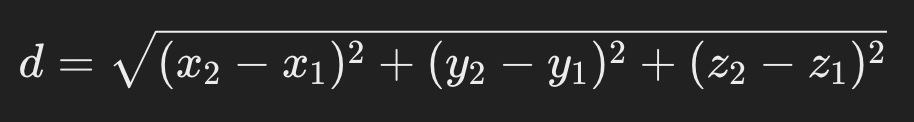

**Operações com vetores:**

As operações com vetores no nosso programa são utilizadas no cálculo da distância Euclidiana, onde utilizamos a subtração vetorial e depois a soma vetorial.


## Código


Defina seu perfil de investimento:
1. Risco (de 0.0 a 1.0, sendo 1.0 o alto risco)
2. Retorno esperado (de 0.0 a 1.0, sendo 1.0 o maior retorno)
3. Liquidez (de 0.0 a 1.0, sendo 1.0 o maior liquidez)
Risco: 0.5
Retorno esperado: 0.7
Liquidez: 0.8

Digite o(s) codigo(s) da(s) acao(s) favorita(s) separadas por virgulas: VALE3, RANI3

Melhores recomendacoes para o seu perfil de investimento:
1. RANI3 - compatibilidade com o perfil: 80.00%
2. VALE3 - compatibilidade com o perfil: 71.72%


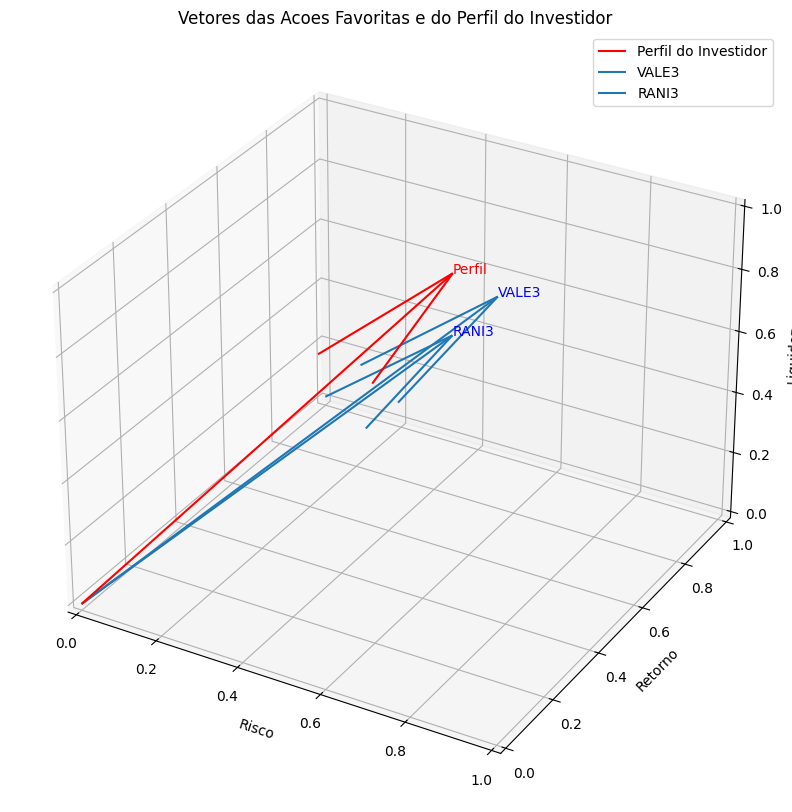

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def buscar_acao(arquivo, nome_acao):
    with open(arquivo, 'r') as f:
        for linha in f:
            dados = linha.strip().split(',')
            if dados[0].strip() == nome_acao:
                return [float(dados[1]), float(dados[2]), float(dados[3])]
    return None

print("Defina seu perfil de investimento:")
print("1. Risco (de 0.0 a 1.0, sendo 1.0 o alto risco)")
print("2. Retorno esperado (de 0.0 a 1.0, sendo 1.0 o maior retorno)")
print("3. Liquidez (de 0.0 a 1.0, sendo 1.0 o maior liquidez)")
perfil_usuario = []

for caracteristica in ["Risco", "Retorno esperado", "Liquidez"]:
    while True:
        entrada = input(f"{caracteristica}: ")
        try:
            valor = float(entrada)
            if 0.0 <= valor <= 1.0:
                perfil_usuario.append(valor)
                break
            else:
                print("Erro: O valor deve estar entre 0.0 e 1.0. Tente novamente.")
        except ValueError:
            print("Erro: Insira um número válido. Tente novamente.")

favoritos = input("\nDigite o(s) codigo(s) da(s) acao(s) favorita(s) separadas por virgulas: ").split(",")

favoritos = [acao.strip() for acao in favoritos]

acoes_favoritas = {}
for favorito in favoritos:
    vetor_acao = buscar_acao("acoes.txt", favorito)
    if vetor_acao:
        acoes_favoritas[favorito] = vetor_acao
    else:
        print(f"Acao '{favorito}' nao encontrada no banco de dados.")

def calcular_distancia(vetor1, vetor2):
    return np.linalg.norm(np.array(vetor1) - np.array(vetor2))

recomendacoes = []
for acao, vetor in acoes_favoritas.items():
    distancia = calcular_distancia(perfil_usuario, vetor)
    recomendacoes.append((acao, distancia))

recomendacoes.sort(key=lambda x: x[1])

print("\nMelhores recomendacoes para o seu perfil de investimento:")
for i, (acao, distancia) in enumerate(recomendacoes):
    distancia = distancia * 100
    compatibilidade = 100 - distancia
    print(f"{i+1}. {acao} - compatibilidade com o perfil: {compatibilidade:.2f}%")

def plotar_vetores(perfil_usuario, acoes_favoritas):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    perfil = np.array(perfil_usuario)
    ax.quiver(0, 0, 0, perfil[0], perfil[1], perfil[2], color='red', label='Perfil do Investidor')
    ax.text(perfil[0], perfil[1], perfil[2], 'Perfil', color='red')

    for acao, vetor in acoes_favoritas.items():
        vetor_np = np.array(vetor)
        ax.quiver(0, 0, 0, vetor_np[0], vetor_np[1], vetor_np[2], label=acao)
        ax.text(vetor_np[0], vetor_np[1], vetor_np[2], acao, color='blue')

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('Risco')
    ax.set_ylabel('Retorno')
    ax.set_zlabel('Liquidez')
    ax.set_title('Vetores das Acoes Favoritas e do Perfil do Investidor')
    ax.legend()
    plt.show()

if acoes_favoritas:
    plotar_vetores(perfil_usuario, acoes_favoritas)
else:
    print("\nNenhuma acao foi selecionada para plotar.")